<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="200" height="400" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Claudia Estefania Meza Fonseca y Gerardo Gonzalez Flores

**Fecha:** 23 de Noviembre 2021.

**Expediente** :  y if729930 .
**Profesor:** Oscar David Jaramillo Zuluaga.
** Repositorio** :https://github.com/if729930/Tarea8_GonzalezG_MezaE
    

# Tarea 8

# <font color = 'red'> Tarea: </font>

Replicar el procedimiento anterior para valoración de opciones 'call', pero en este caso para opciones tipo 'put' y además deben de comparar con los resultados teoricos del método de valuación de Black-Scholes (ecuación del principio de clase)

In [96]:
#Librerías
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
%matplotlib inline
from datetime import datetime, date
from math import log, sqrt, pi, exp
from scipy.stats import norm
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)

In [67]:
#Estudiante 1 : Claudia Estefanía Meza
import yfinance as yf

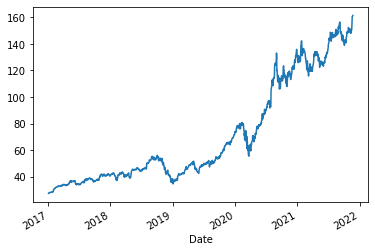

In [68]:
ticker = yf.download('AAPL', 
                      start='2017-01-01', 
                      progress=False)
closes = ticker['Adj Close']
closes.plot()

In [69]:
def calc_daily_ret(closes):
    return np.log(closes/closes.shift(1)).iloc[1:]

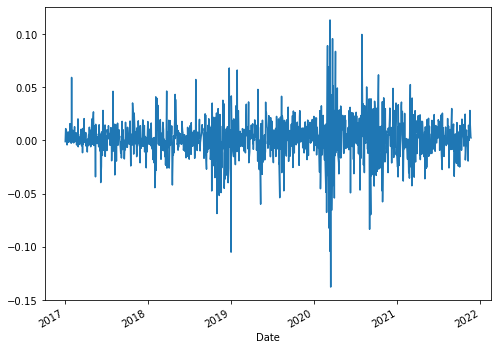

In [70]:
ret_aapl = calc_daily_ret(closes)
ret_aapl.plot(figsize=(8,6));

In [71]:
# Obtenemos el rendimiento simple
Ri = closes.pct_change(1).iloc[1:]
# Obtenemos su media y desviación estándar de los rendimientos
mu_R = Ri.mean()
sigma_R = Ri.std()
Ri

Date
2017-01-04   -0.001
2017-01-05    0.005
2017-01-06    0.011
2017-01-09    0.009
2017-01-10    0.001
              ...  
2021-11-17    0.016
2021-11-18    0.029
2021-11-19    0.017
2021-11-22    0.003
2021-11-23    0.002
Name: Adj Close, Length: 1232, dtype: float64

In [72]:
from datetime import date

today = pd.Timestamp(date.today())
expiry = '2022-01-21'

nscen = 10000
dates = pd.date_range(start=today, end=expiry, freq='B')
ndays = len(dates)
dates, ndays

(DatetimeIndex(['2021-11-23', '2021-11-24', '2021-11-25', '2021-11-26',
                '2021-11-29', '2021-11-30', '2021-12-01', '2021-12-02',
                '2021-12-03', '2021-12-06', '2021-12-07', '2021-12-08',
                '2021-12-09', '2021-12-10', '2021-12-13', '2021-12-14',
                '2021-12-15', '2021-12-16', '2021-12-17', '2021-12-20',
                '2021-12-21', '2021-12-22', '2021-12-23', '2021-12-24',
                '2021-12-27', '2021-12-28', '2021-12-29', '2021-12-30',
                '2021-12-31', '2022-01-03', '2022-01-04', '2022-01-05',
                '2022-01-06', '2022-01-07', '2022-01-10', '2022-01-11',
                '2022-01-12', '2022-01-13', '2022-01-14', '2022-01-17',
                '2022-01-18', '2022-01-19', '2022-01-20', '2022-01-21'],
               dtype='datetime64[ns]', freq='B'),
 44)

In [73]:
#Rendimiento Logarítmico:
ri = calc_daily_ret(closes)
# Usando la media y desviación estándar de los rendimientos logarítmicos
mu_r = ri.mean()
sigma_r = ri.std()

In [77]:
dt = 1; # Rendimiento diario 
Z = np.random.randn(ndays,nscen)  # Z ~ N(0,1)
# Simulación de los rendimientos
sim_rend = pd.DataFrame(mu_R*dt+Z*sigma_R*np.sqrt(dt),index=dates)
sim_rend

,0,1,2,...,9997,9998,9999
2021-11-23,-7.434e-04,0.024,-1.762e-02,...,-0.008,-0.010,2.288e-02
2021-11-24,-2.163e-02,-0.003,5.086e-03,...,0.035,0.013,3.867e-02
2021-11-25,8.889e-03,-0.015,-1.988e-02,...,0.016,0.027,1.110e-02
2021-11-26,2.150e-03,-0.015,-1.314e-03,...,0.012,0.016,6.594e-03
2021-11-29,-4.414e-03,0.007,-1.590e-02,...,-0.006,-0.009,4.031e-03
...,...,...,...,...,...,...,...
2022-01-17,4.074e-03,0.008,-5.325e-04,...,-0.007,-0.012,3.386e-02
2022-01-18,8.899e-04,-0.028,5.880e-03,...,0.020,-0.011,8.783e-04
2022-01-19,2.176e-02,-0.008,-2.239e-02,...,-0.004,0.033,-1.696e-02
2022-01-20,2.954e-02,-0.038,-4.506e-02,...,0.003,-0.015,-3.452e-02


In [78]:
# Simulación normal de los rendimientos
Ri_dt = pd.DataFrame(mu_R * dt + Z * sigma_r * np.sqrt(dt),
                     index = dates)

# Simulación del precio
S_0 = closes.iloc[-1]
S_T = S_0*np.exp(sim_rend.cumsum())

$$ P(S(t),t)=max\{K-S(T),0\} \rightarrow \text{En el caso de Put}$$ 

In [80]:
mu = ret_aapl.mean()
sigma = ret_aapl.std()
mu,sigma

(0.001441454784210329, 0.019197988496740377)

In [83]:
r = 0.0018/360 # Tasa diaria
strike=100 #strikeprice
fecha = date.today()
nscen = 50
dates = pd.date_range(start= fecha, periods = ndays)
ndays = len(dates)
S0 = closes.iloc[-1]  # Condición inicial del precio a simular

sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r,index=dates)
sim_closes = S0*np.exp(sim_ret.cumsum())
#strike = pd.DataFrame({'Strike':K*np.ones(ndays)}, index=dates)
#simul = pd.concat([closes_aapl.T,strike.T,sim_closes.T]).T
#simul.plot(figsize=(8,6),legend=False);
sim_closes


,0,1,2,...,47,48,49
2021-11-23,158.675,164.624,161.586,...,160.788,163.942,157.573
2021-11-24,154.970,170.568,167.881,...,159.557,163.810,154.573
2021-11-25,151.031,171.608,167.098,...,158.787,164.099,155.935
2021-11-26,154.193,167.721,166.994,...,157.547,159.811,155.271
2021-11-27,154.476,172.204,166.943,...,156.059,162.197,157.291
...,...,...,...,...,...,...,...
2022-01-01,158.225,184.489,158.470,...,204.012,161.408,163.021
2022-01-02,155.714,181.420,159.234,...,195.886,164.593,163.063
2022-01-03,152.441,178.014,161.274,...,198.411,159.969,164.970
2022-01-04,151.644,175.112,161.653,...,189.841,162.936,165.004


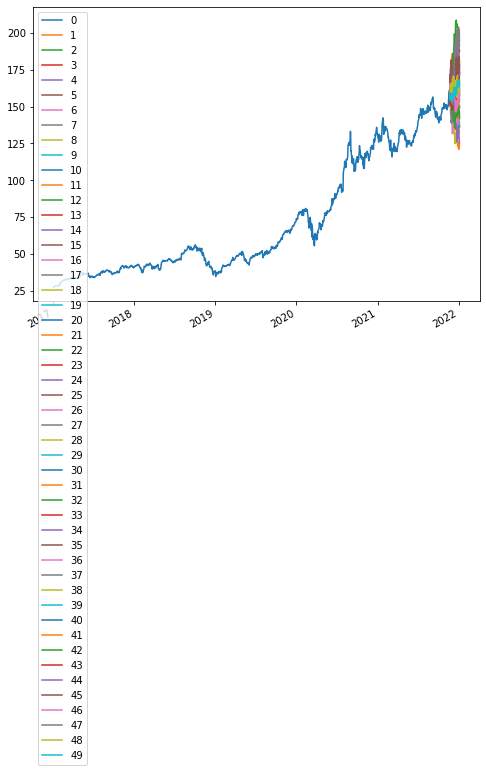

In [84]:
# Precios simulados con los precios descargados
pd.concat([closes,sim_closes]).plot(figsize = (8,6));

In [19]:
aapl = yf.Ticker("AAPL")
opt = aapl.option_chain('2022-01-21')

In [20]:
opt.calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AAPL220121C00025000,2021-11-19 17:19:08,25.00,135.07,134.70,135.75,0.000000,0.000000,3,94.0,2.251957,True,REGULAR,USD
1,AAPL220121C00027500,2021-11-11 17:24:00,27.50,120.60,132.50,133.40,0.000000,0.000000,8,182.0,2.293950,True,REGULAR,USD
2,AAPL220121C00028750,2021-11-05 15:11:04,28.75,122.53,131.20,132.20,0.000000,0.000000,9,130.0,2.235356,True,REGULAR,USD
3,AAPL220121C00030000,2021-11-19 19:12:01,30.00,130.75,129.70,130.80,0.000000,0.000000,1,52.0,2.048833,True,REGULAR,USD
4,AAPL220121C00031250,2021-11-04 19:53:24,31.25,119.70,128.50,129.55,0.000000,0.000000,165,39.0,2.016607,True,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,AAPL220121C00720000,2020-08-28 19:41:41,720.00,1035.40,319.00,324.00,1000.550050,2871.019000,19,257.0,0.000000,False,REGULAR,USD
142,AAPL220121C00740000,2020-08-28 19:54:01,740.00,31.98,30.70,31.90,-0.020000,-0.062501,55,256.0,3.569642,False,REGULAR,USD
143,AAPL220121C00800000,2020-08-28 19:29:41,800.00,304.00,300.00,305.00,279.000000,1116.000000,63,1098.0,0.000000,False,REGULAR,USD
144,AAPL220121C00900000,2020-08-28 19:26:55,900.00,18.13,17.35,18.40,0.029999,0.165739,5,NaN,3.190127,False,REGULAR,USD


In [23]:
puts=opt.puts
puts

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AAPL220121P00025000,2021-10-27 17:37:08,25.00,0.01,0.00,0.01,0.00000,0.000000,1.0,1041,1.406253,False,REGULAR,USD
1,AAPL220121P00027500,2021-11-22 19:29:52,27.50,0.01,0.00,0.01,0.00000,0.000000,1.0,3509,1.312503,False,REGULAR,USD
2,AAPL220121P00028750,2021-10-14 14:15:51,28.75,0.01,0.01,0.02,0.00000,0.000000,3.0,978,1.421878,False,REGULAR,USD
3,AAPL220121P00030000,2021-11-08 14:51:12,30.00,0.01,0.00,0.02,0.00000,0.000000,10.0,11842,1.343753,False,REGULAR,USD
4,AAPL220121P00031250,2021-10-20 14:17:34,31.25,0.01,0.00,0.17,0.00000,0.000000,50.0,765,1.601564,False,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,AAPL220121P00620000,2020-08-24 19:58:52,620.00,11.60,2.70,3.20,-157.29999,-93.132030,NaN,241,0.000010,True,REGULAR,USD
137,AAPL220121P00640000,2020-08-24 15:41:13,640.00,11.84,2.91,3.20,-169.66000,-93.476585,NaN,583,0.000010,True,REGULAR,USD
138,AAPL220121P00660000,2020-08-24 19:58:52,660.00,14.40,3.10,3.65,-185.54001,-92.797840,3.0,618,0.000010,True,REGULAR,USD
139,AAPL220121P00680000,2020-08-24 15:35:52,680.00,14.20,3.30,3.85,-200.84000,-93.396580,82.0,3033,0.000010,True,REGULAR,USD


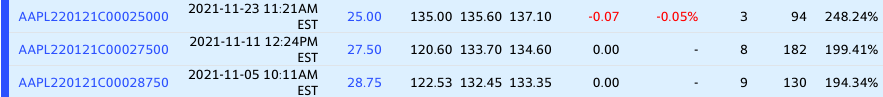

In [107]:
Hoy = date.today()
expiry = '2022-01-21'
K = 150 # strike price
nscen = 10000
dates = pd.date_range(start= Hoy, 
                      periods = ndays)
ndays = len(dates)
S0 = closes.iloc[-1]  # Condición inicial del precio a simular

# simular rendimientos
sim_ret = pd.DataFrame(sigma * np.random.randn(ndays,nscen) + r,
                       index = dates)

# Simular precios
sim_closes = S0*np.exp(sim_ret.cumsum())

Prima    3.261
Name: 2022-01-05 00:00:00, dtype: float64

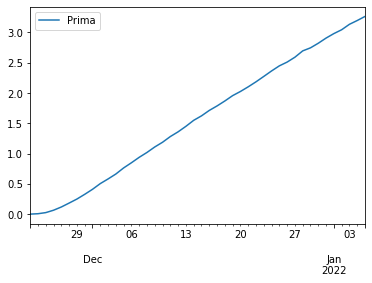

In [108]:
strike = 150
put = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(strike-sim_closes, 0).mean(axis=1)}, 
                    index = dates)
put.plot();
put.iloc[-1]

In [106]:
ic = 0.95
sigma_est = sim_closes.iloc[-1].sem()
mean_est = call.iloc[-1].Prima
i1 = st.t.interval(ic,nscen-1, loc = mean_est, scale = sigma_est)
i2 = st.norm.interval(ic, loc = mean_est, scale=sigma_est)
print(i1)
print(i2)

(15.553167911795796, 16.368774596210844)
(15.55321727570765, 16.368725232298992)


In [90]:
vol = ret_aapl.std()*np.sqrt(252)
media = ret_aapl.mean()*252
maduracion = ndays
st = closes.iloc[-1]
rf = r*360

In [91]:
d1 = (np.log(st/K)+(rf+(vol**2)/2))/vol #Black Scholes
d2 = d1-vol
put = K*np.exp(-rf)*norm.cdf(-d2)-st*norm.cdf(-d1)
print('El valor de la opción con ByS es:',put)
print('Valor de la opción simulado es de:',call.iloc[-1].values)

El valor de la opción con B&S es: 13.56622241976951
Valor de la opción simulado es de: [15.96097125]


Podemos observar una discrepancia con un error de 2 puntos. Si bien es una buena aproximación creo que sería muy arriesgado tomarla si eres averso al riesgo.

In [47]:
conda install pandas-datareader

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [48]:
#Estudiante 2 Gerardo González Flores
#importar los paquetes que se van a usar
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
%matplotlib inline
#algunas opciones para Pandas
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)


In [49]:
# Función para descargar precios de cierre ajustados:
def get_adj_closes(tickers, start_date=None, end_date=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

def calc_daily_ret(closes):
    return np.log(closes/closes.shift(1)).iloc[1:]

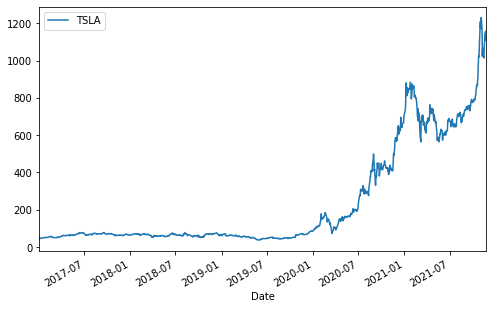

In [50]:
ticker = ['TSLA']
start_date = '2017-01-01'

closes_tsla = get_adj_closes(ticker, start_date)
closes_tsla.plot(figsize=(8,5));
plt.legend(ticker);

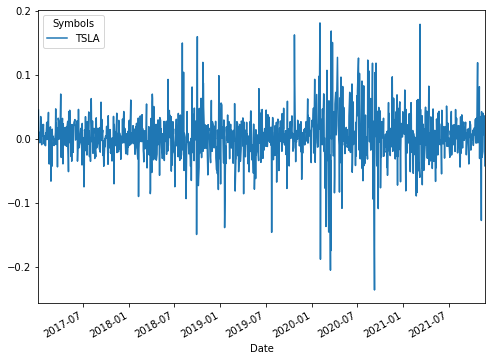

In [51]:
ret_tsla = calc_daily_ret(closes_tsla)
ret_tsla.plot(figsize=(8,6));


In [52]:
# Obtenemos el rendimiento simple
Ri = closes_tsla.pct_change(1).iloc[1:]
# Obtenemos su media y desviación estándar de los rendimientos
mu_R = Ri.mean()[0]
sigma_R = Ri.std()[0]
Ri

Symbols,TSLA
Date,
2017-01-04,0.046
2017-01-05,-0.001
2017-01-06,0.010
2017-01-09,0.010
2017-01-10,-0.006
...,...
2021-11-17,0.033
2021-11-18,0.007
2021-11-19,0.037


In [53]:
from datetime import date

today = pd.Timestamp(date.today())
expiry = '2022-09-16'

nscen = 10000
dates = pd.date_range(start = today, 
                      end = expiry, 
                      freq = 'B')
ndays = len(dates)
dates, ndays

(DatetimeIndex(['2021-11-23', '2021-11-24', '2021-11-25', '2021-11-26',
                '2021-11-29', '2021-11-30', '2021-12-01', '2021-12-02',
                '2021-12-03', '2021-12-06',
                ...
                '2022-09-05', '2022-09-06', '2022-09-07', '2022-09-08',
                '2022-09-09', '2022-09-12', '2022-09-13', '2022-09-14',
                '2022-09-15', '2022-09-16'],
               dtype='datetime64[ns]', length=214, freq='B'), 214)

In [54]:
ri = calc_daily_ret(closes_tsla)

# Usando la media y desviación estándar de los rendimientos logarítmicos
mu_r = ri.mean()[0]
sigma_r = ri.std()[0]


# Simulación del rendimiento 
dt = 1
Z = np.random.randn(ndays,nscen) 

sim_ret_ri = pd.DataFrame(mu_r*dt+Z*sigma_r*np.sqrt(dt), index=dates)

# Simulación normal de los rendimientos
Ri_dt = pd.DataFrame(mu_R * dt + Z * sigma_r * np.sqrt(dt),
                     index = dates)

# Simulación del precio
S_0 = closes_tsla.iloc[-1,0]
S_T = S_0*np.exp(sim_ret_ri.cumsum())

In [55]:
mu = ret_tsla.mean()[0]
sigma = ret_tsla.std()[0]
mu, sigma

(0.0026305419927991074, 0.0379263331559284)

In [56]:
# Tasa de bonos de 1 yr de fecha 19/11/2021 -> 0.18%
r = 0.00018/360 # Tasa diaria

In [57]:
today = pd.to_datetime(date.today())
expiry = '2022-09-16'

dates = pd.date_range(start = today, 
                      end = expiry, 
                      freq = 'B')

ndays = len(dates)
nscen = 10
dates

DatetimeIndex(['2021-11-23', '2021-11-24', '2021-11-25', '2021-11-26',
               '2021-11-29', '2021-11-30', '2021-12-01', '2021-12-02',
               '2021-12-03', '2021-12-06',
               ...
               '2022-09-05', '2022-09-06', '2022-09-07', '2022-09-08',
               '2022-09-09', '2022-09-12', '2022-09-13', '2022-09-14',
               '2022-09-15', '2022-09-16'],
              dtype='datetime64[ns]', length=214, freq='B')

In [58]:
sim_ret = pd.DataFrame(sigma * np.random.randn(ndays,nscen) + r, 
                       index = dates)
sim_ret.cumsum()

,0,1,2,...,7,8,9
2021-11-23,0.025,-0.059,-0.018,...,-4.881e-04,0.097,-0.049
2021-11-24,0.086,-0.139,-0.026,...,-8.431e-02,0.101,-0.008
2021-11-25,0.069,-0.157,-0.092,...,-3.786e-02,0.148,0.002
2021-11-26,0.038,-0.171,-0.157,...,-6.719e-02,0.126,-0.017
2021-11-29,0.033,-0.139,-0.138,...,-4.660e-02,0.079,0.011
...,...,...,...,...,...,...,...
2022-09-12,-1.165,0.079,-1.105,...,2.925e-01,0.288,0.163
2022-09-13,-1.186,0.106,-1.073,...,3.639e-01,0.304,0.154
2022-09-14,-1.199,0.167,-1.092,...,3.557e-01,0.270,0.200
2022-09-15,-1.120,0.121,-1.146,...,3.540e-01,0.247,0.178


In [59]:
S0 = closes_tsla.iloc[-1,0]  # Condición inicial del precio a simular
sim_closes = S0*np.exp(sim_ret.cumsum())
sim_closes

,0,1,2,...,7,8,9
2021-11-23,1136.686,1045.925,1089.670,...,1108.489,1222.230,1056.011
2021-11-24,1208.442,965.183,1080.058,...,1019.359,1227.156,1100.546
2021-11-25,1188.711,947.846,1011.586,...,1067.831,1286.396,1111.724
2021-11-26,1151.959,934.565,947.596,...,1036.963,1258.520,1090.714
2021-11-29,1146.716,964.644,965.756,...,1058.536,1200.333,1121.614
...,...,...,...,...,...,...,...
2022-09-12,345.971,1200.734,367.313,...,1485.826,1478.957,1305.158
2022-09-13,338.728,1233.219,379.171,...,1595.875,1503.705,1294.121
2022-09-14,334.240,1310.803,372.218,...,1582.773,1452.993,1353.973
2022-09-15,361.719,1251.743,352.691,...,1580.058,1419.459,1325.200


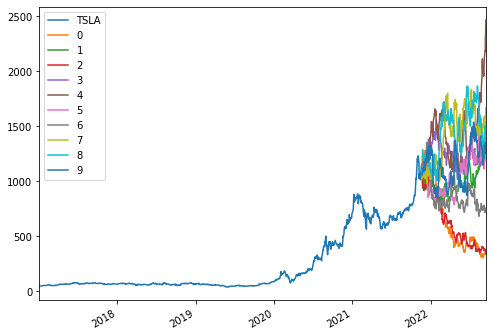

In [60]:
# Precios simulados con los precios descargados
pd.concat([closes_tsla,sim_closes]).plot(figsize = (8,6));

In [61]:
from datetime import date
Hoy = date.today()
expiry = '2022-09-16'
K = 1057.35 # strike price
nscen = 10000
dates = pd.date_range(start= Hoy, 
                      periods = ndays)
ndays = len(dates)
S0 = closes_tsla.iloc[-1,0]  # Condición inicial del precio a simular

# simular rendimientos
sim_ret = pd.DataFrame(sigma * np.random.randn(ndays,nscen) + r,
                       index = dates)

# Simular precios
sim_closes = S0*np.exp(sim_ret.cumsum())

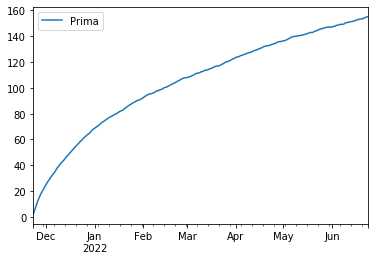

In [62]:
# Valor del put 
strike = 1057.35
put_tsla = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(strike-sim_closes, 0).mean(axis=1)}, 
                    index = dates)
put_tsla.plot();

In [63]:
put_tsla.iloc[-1]

Prima    155.024
Name: 2022-06-24 00:00:00, dtype: float64

In [64]:
confianza = 0.95
sigma_est = sim_closes.iloc[-1].sem()
mean_est = put_tsla.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc = mean_est, scale = sigma_est)
i2 = st.norm.interval(confianza, loc = mean_est, scale=sigma_est)
print(i1)
print(i2)

(140.00237184686054, 170.04542741930763)
(140.00419017765088, 170.0436090885173)


In [65]:
vol = ret_tsla['TSLA'].std()*np.sqrt(252)
media = ret_tsla['TSLA'].mean()*252
maduracion = ndays
st = closes_tsla.iloc[-1,0]
rf = r*360

In [67]:
#Black Scholes
from scipy.stats import norm
d1 = (np.log(st/K)+(rf+(vol**2)/2))/vol
d2 = d1-vol
put = K*np.exp(-rf)*norm.cdf(-d2)-st*norm.cdf(-d1)
print('El valor de la opción con Black Scholes es:',put)
print('Valor de la opción simulado es de:',put_tsla.iloc[-1].values)


El valor de la opción con Black Scholes es: 231.12118855553393
Valor de la opción simulado es de: [155.02389963]
